In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import datetime
%matplotlib inline

In [78]:
movies = pd.read_csv('../data/ml-20m/movies.csv')

In [127]:
movies.loc[movies['genres'].str.contains('Noir')]

,movieId,title,genres
162,164,Devil in a Blue Dress (1995),Crime|Film-Noir|Mystery|Thriller
317,320,Suture (1993),Film-Noir|Thriller
343,347,Bitter Moon (1992),Drama|Film-Noir|Romance
733,746,Force of Evil (1948),Film-Noir
896,913,"Maltese Falcon, The (1941)",Film-Noir|Mystery
905,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
912,929,Foreign Correspondent (1940),Drama|Film-Noir|Mystery|Thriller
913,930,Notorious (1946),Film-Noir|Romance|Thriller
925,942,Laura (1944),Crime|Film-Noir|Mystery
980,999,2 Days in the Valley (1996),Crime|Film-Noir


In [138]:
ratings = pd.read_csv('../data/ml-20m/ratings.csv')

In [193]:
ratings['date'] = ratings['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [194]:
ratings = ratings.sort_values('timestamp')

In [220]:
ratings['norm_rating'] = ratings.groupby('movieId')['rating'].transform(lambda x: (x - x.mean()) / x.std())

In [195]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
         'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [248]:
ratings.groupby('userId').count().sort_values('rating', ascending=False).head(20)

,movieId,rating,timestamp,date,norm_rating
userId,,,,,
118205,9254,9254,9254,9254,9024
8405,7515,7515,7515,7515,7513
82418,5646,5646,5646,5646,5640
121535,5520,5520,5520,5520,5485
125794,5491,5491,5491,5491,5481
74142,5447,5447,5447,5447,5428
34576,5356,5356,5356,5356,5351
131904,5330,5330,5330,5330,5239
83090,5169,5169,5169,5169,5169


In [252]:
u1 = ratings.loc[ratings['userId'] == 8405, :]
u1['genres'] = u1['movieId'].apply(lambda x: movies.loc[movies['movieId'] == x, 'genres'].values[0])
for g in genres:
    u1[f'is{g}'] = u1['genres'].str.contains(g)
u1_drama = u1.loc[u1['isDrama'], :]
u1_comedy = u1.loc[u1['isComedy'], :]


C:\Users\Ben\Anaconda3\envs\WorldModelsDk\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ben\Anaconda3\envs\WorldModelsDk\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


C:\Users\Ben\Anaconda3\envs\WorldModelsDk\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


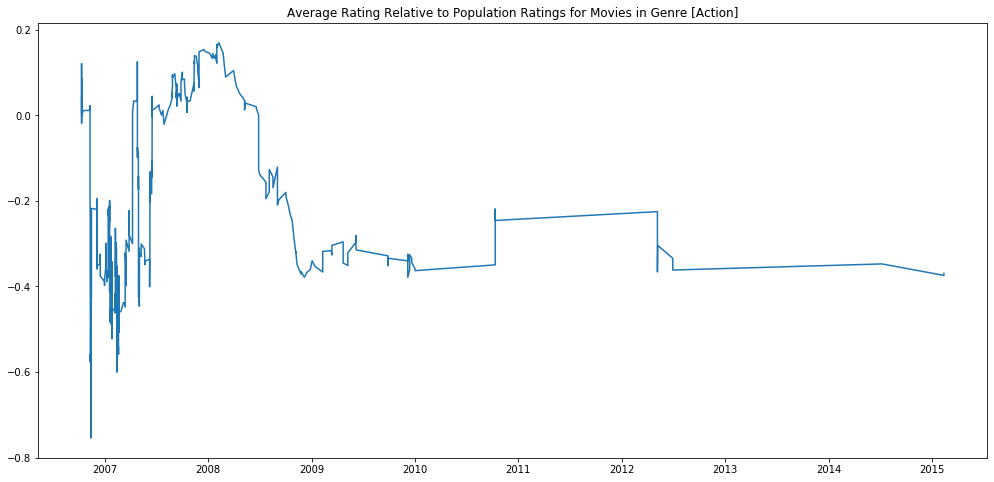

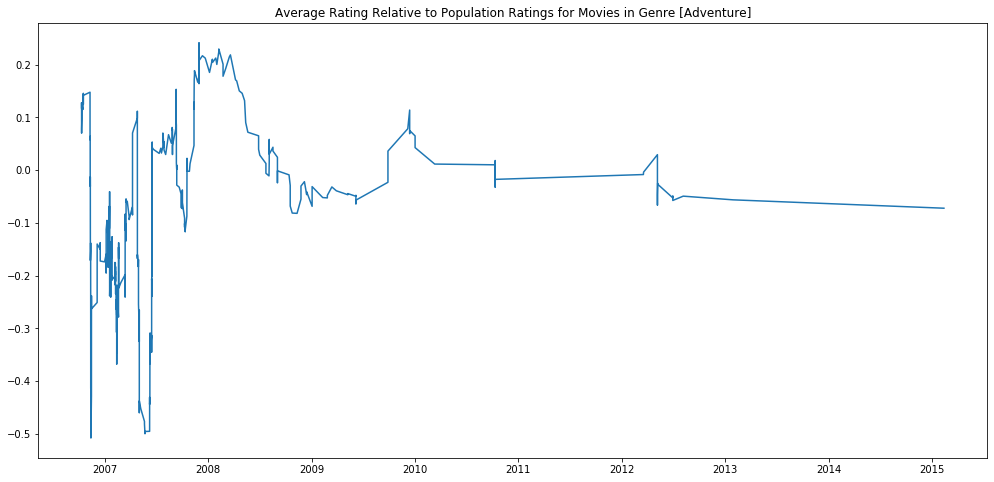

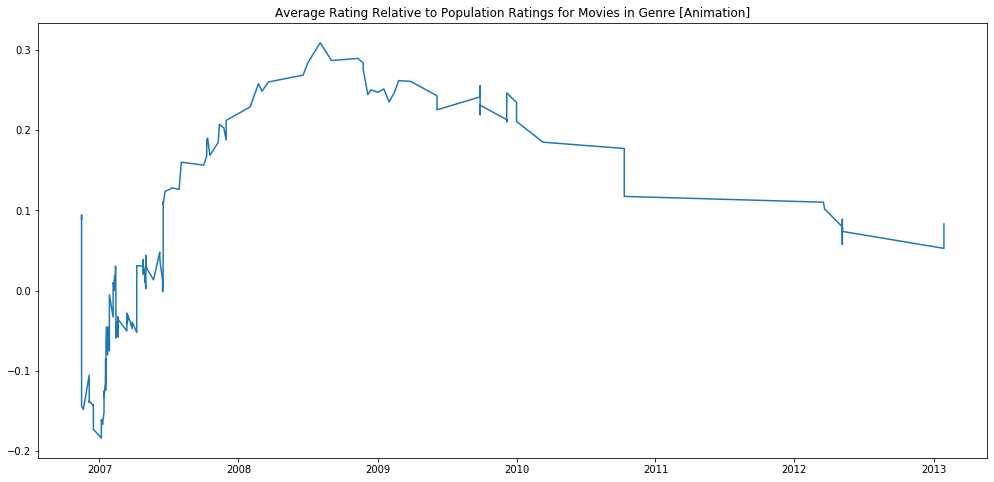

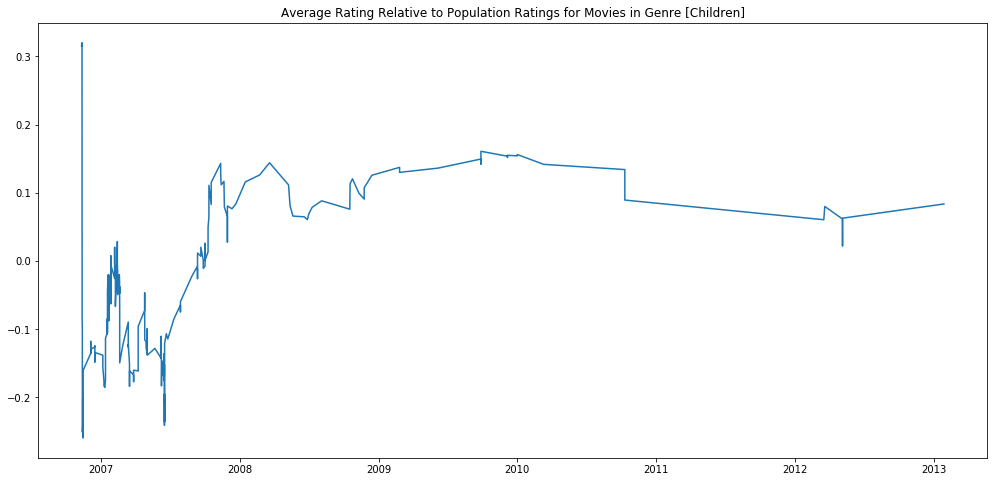

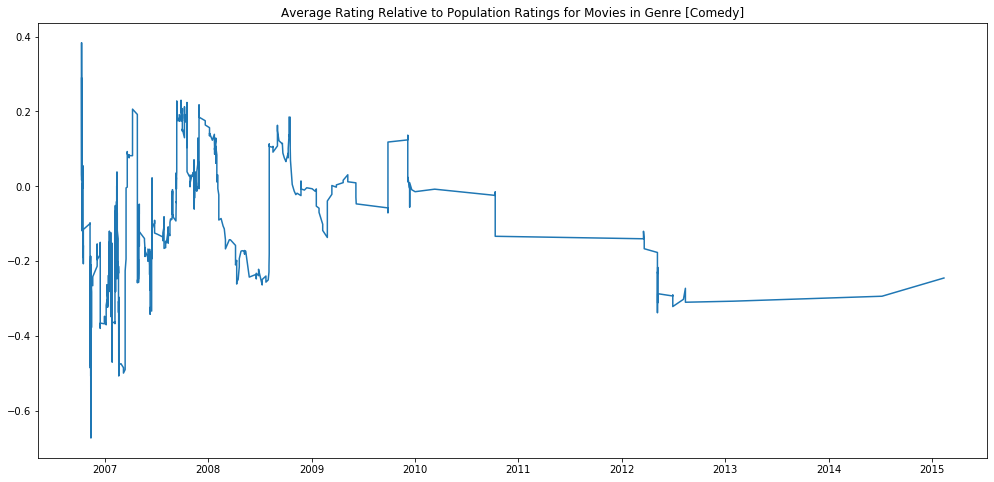

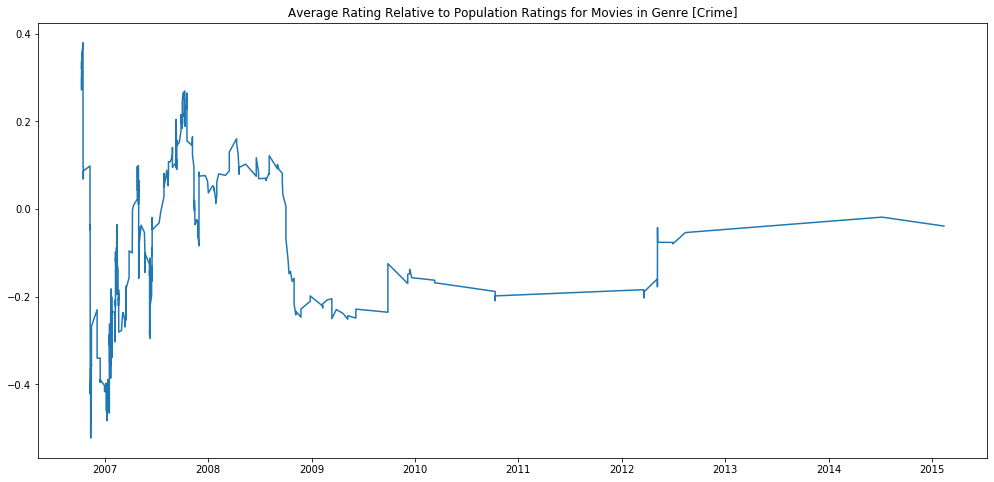

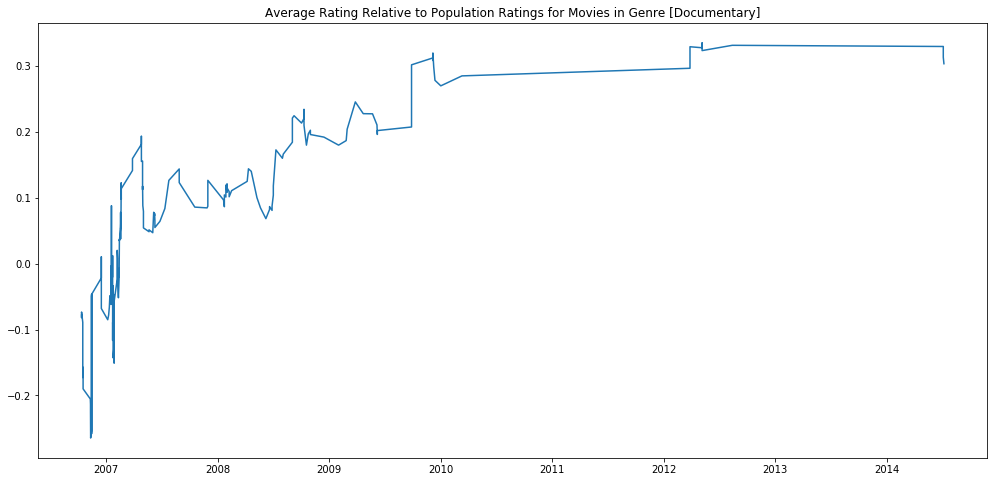

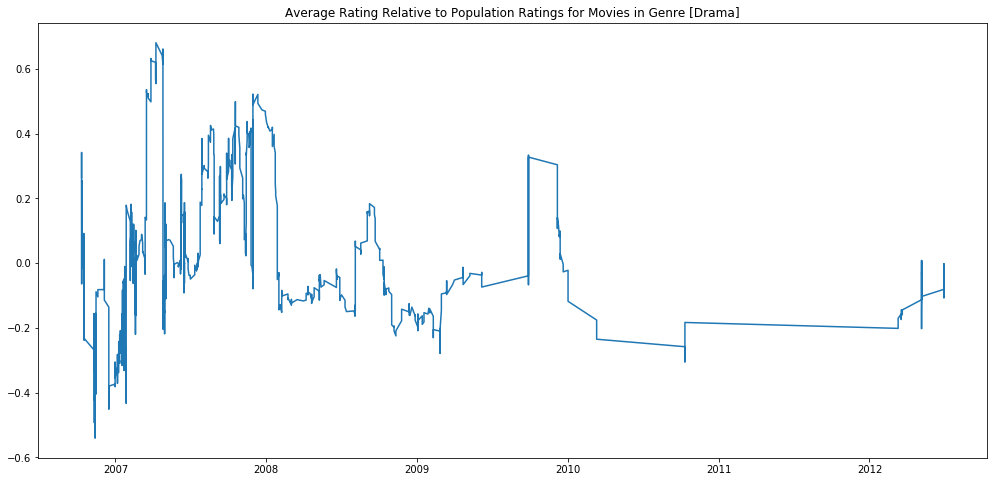

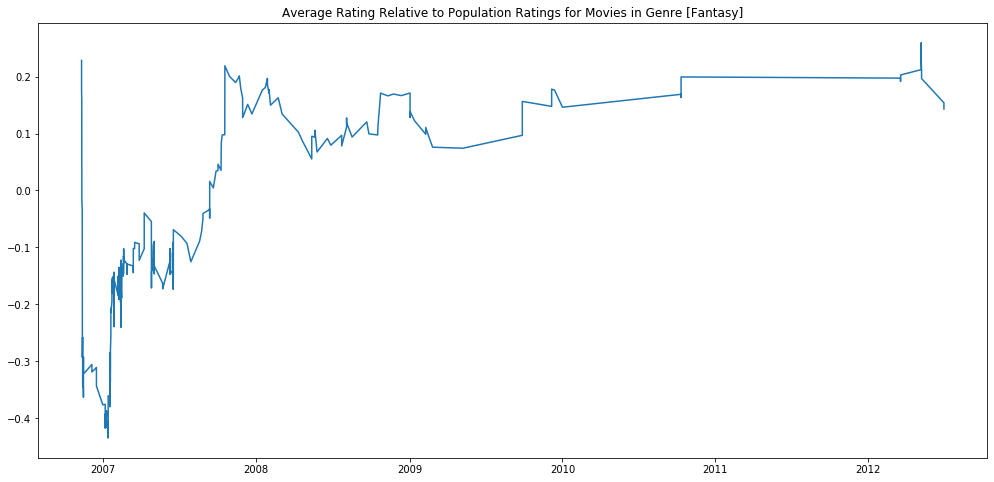

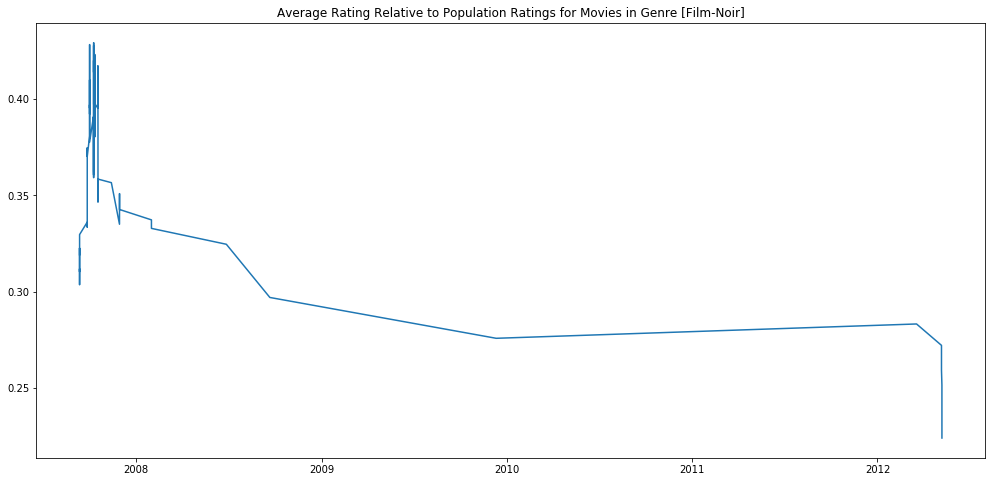

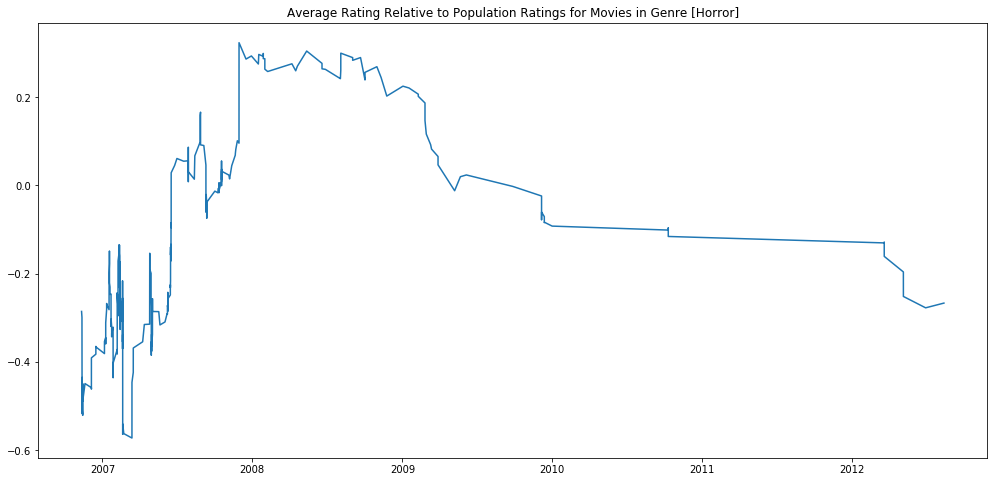

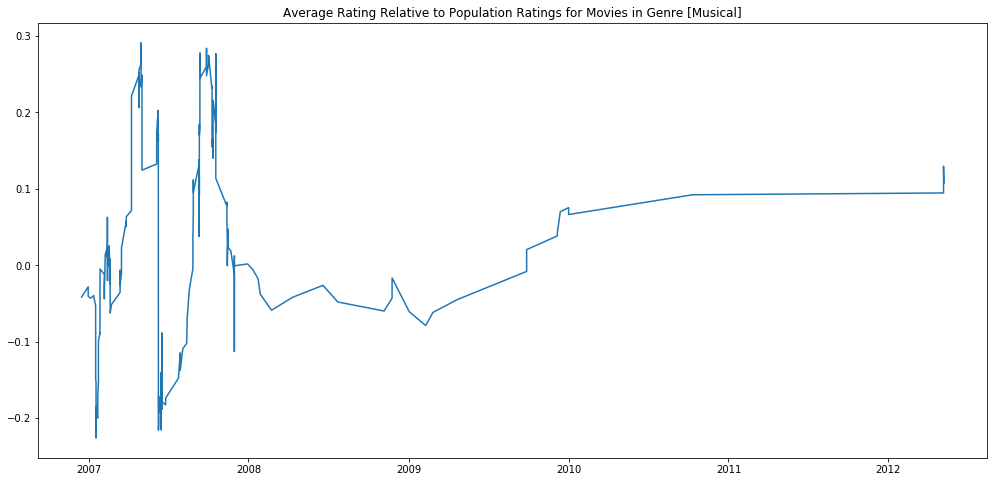

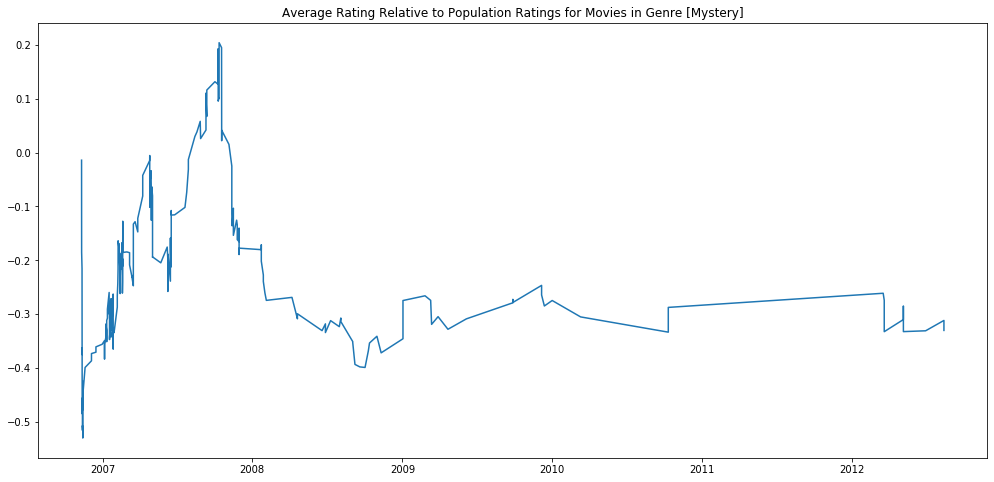

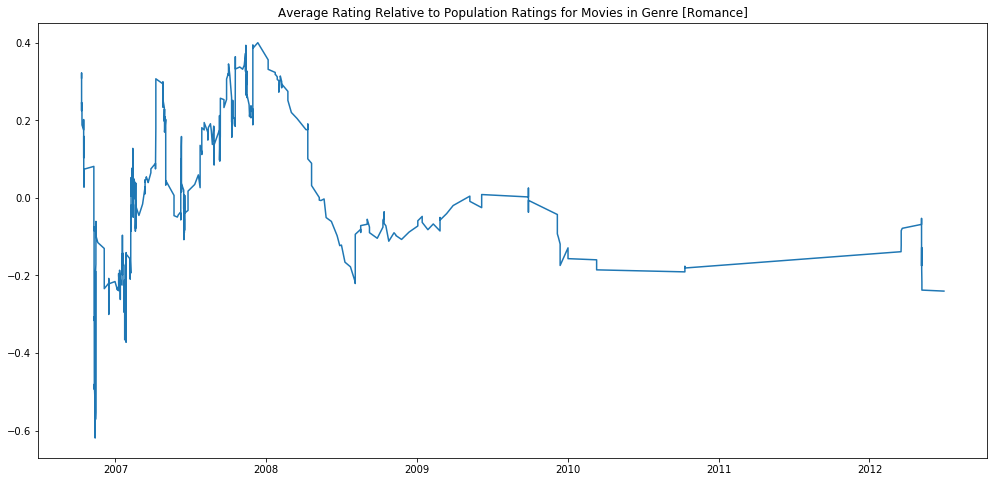

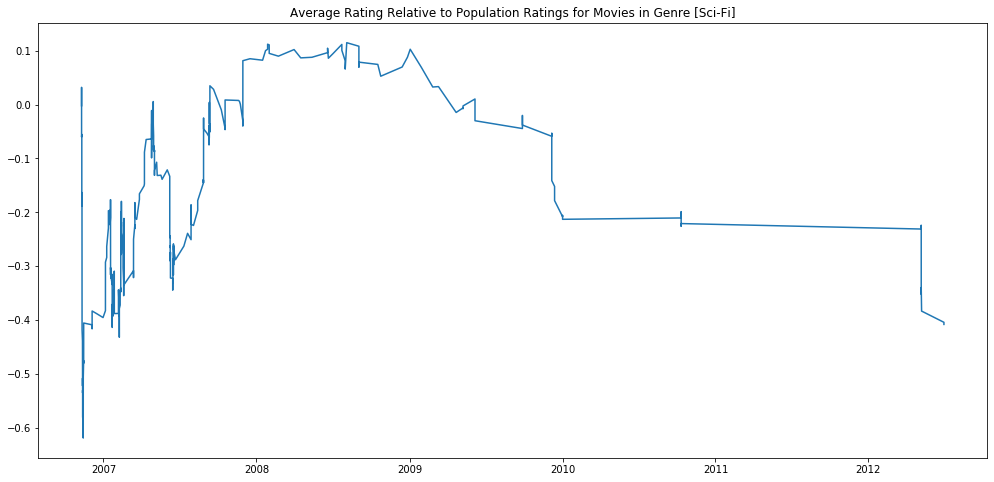

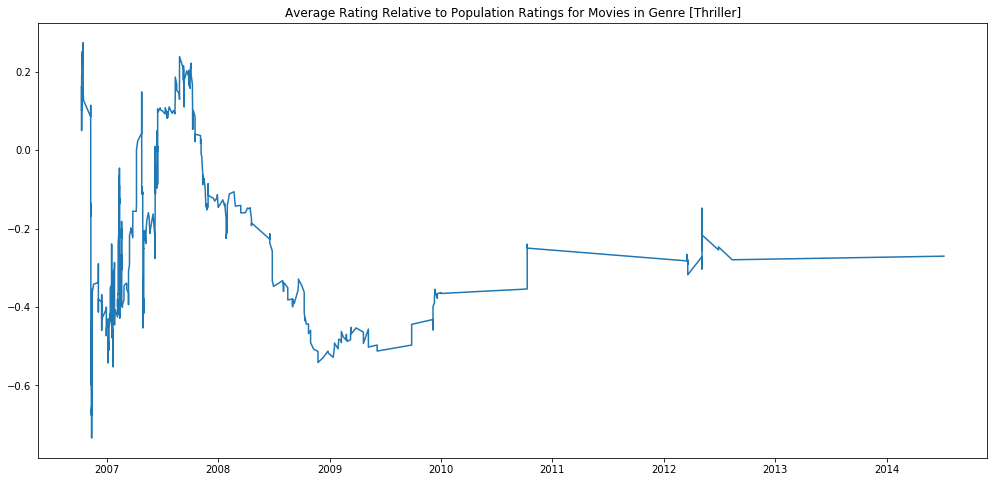

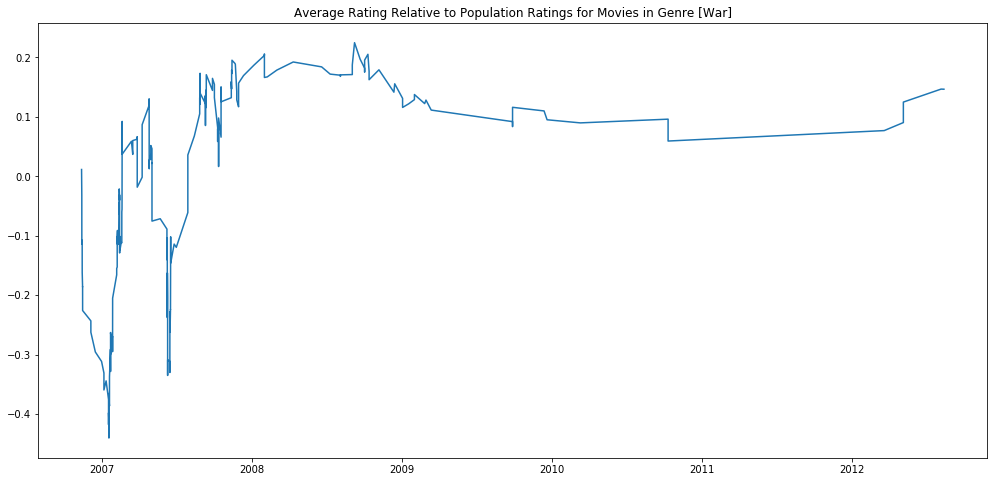

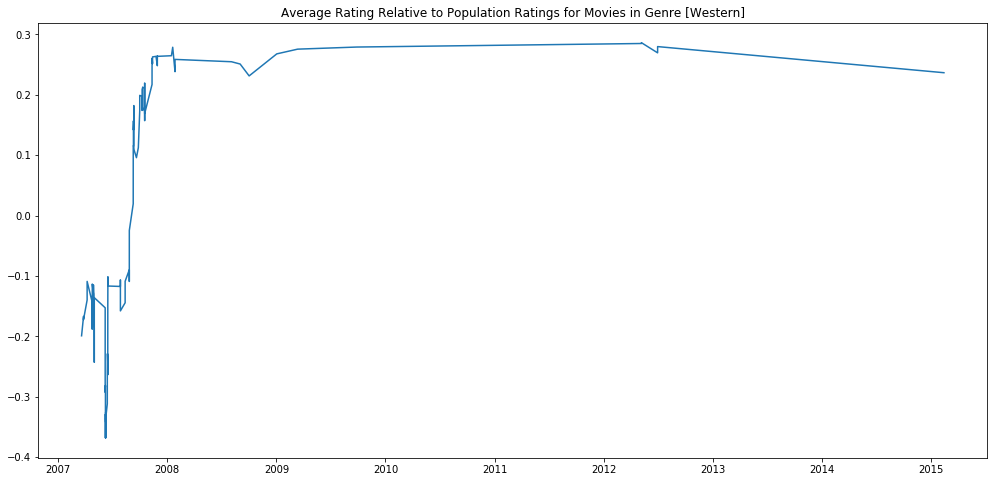

In [254]:
for g in genres:
    fig, ax = plt.subplots(figsize=(17, 8))
    _u1 = u1.loc[u1[f'is{g}'], :]
    _u1['rolling'] = _u1['norm_rating'].rolling(50).mean()
    ax.plot(_u1['date'].values, _u1['rolling'].values)
    plt.title(f'Average Rating Relative to Population Ratings for Movies in Genre [{g}]')
    plt.savefig(f'{g}.png')


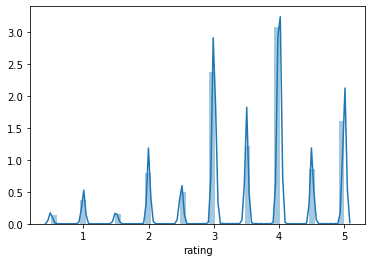

In [8]:
sns.distplot(ratings['rating'])

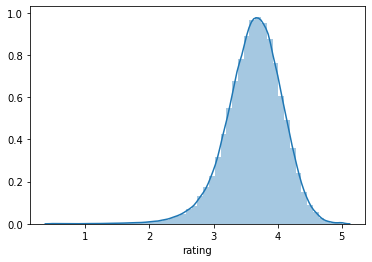

In [9]:
sns.distplot(ratings.groupby('userId').mean()['rating'])

In [73]:
pd.set_option('display.max_rows', 99999)

In [119]:
movies.loc[movies['title'].str.contains('Odyssey')]

,movieId,title,genres
907,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
2089,2173,"Navigator: A Mediaeval Odyssey, The (1988)",Adventure|Fantasy|Sci-Fi
4616,4711,Theremin: An Electronic Odyssey (1993),Documentary
6826,6938,Billabong Odyssey (2003),Documentary
9389,27598,Chinese Odyssey 2002 (Tian xia wu shuang) (2002),Action|Comedy|Romance
11633,51024,The Odyssey (1997),Adventure|Drama|Fantasy
14113,70828,Space Odyssey: Voyage to the Planets (2004),Documentary|Drama|Sci-Fi
16812,84980,Lapland Odyssey (Napapiirin sankarit) (2010),Comedy|Drama|Romance
21500,104317,Flight of the Conchords: A Texan Odyssey (2006),Comedy
25375,119878,Solomon Northup's Odyssey (1984),(no genres listed)


In [52]:
ordered_gb = ratings.groupby('movieId').count()
ordered_gb = ordered_gb.loc[ordered_gb['rating'] > 100]
ordered = ratings.loc[ratings['movieId'].isin(ordered_gb.index)]

In [53]:
ordered = ordered.sort_values('timestamp')


In [94]:
ordered['date'] = ordered['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [97]:
ordered.head()

,userId,movieId,rating,timestamp,date
4182421,28507,1176,4.0,789652004,1995-01-09 06:46:44
18950930,131160,21,3.0,789652009,1995-01-09 06:46:49
18950936,131160,47,5.0,789652009,1995-01-09 06:46:49
18950979,131160,1079,3.0,789652009,1995-01-09 06:46:49
14452502,99851,10,4.0,822873600,1996-01-28 19:00:00


In [54]:
stationarity = ordered.groupby('movieId')['rating'].apply(lambda x: adfuller(x.values))

In [69]:
df = stationarity.to_frame()
df['p'] = [v[1] for v in df['rating'].values]

In [74]:
df.sort_values('p', ascending=False)

,rating,p
movieId,,
32022,"(-0.7511865351366022, 0.8330420208282714, 11, ...",8.330420e-01
797,"(-0.9726972453659318, 0.7630916673885215, 8, 1...",7.630917e-01
1311,"(-1.0920579260438854, 0.7182286978806267, 7, 1...",7.182287e-01
3905,"(-1.2440440587621178, 0.6543680869702962, 11, ...",6.543681e-01
889,"(-1.4020617311600607, 0.5812873005224404, 5, 1...",5.812873e-01
794,"(-1.4694445298165595, 0.5485689323175774, 6, 9...",5.485689e-01
8987,"(-1.6203930921004368, 0.47252322071448155, 7, ...",4.725232e-01
8130,"(-1.6782466647434338, 0.4423538565920623, 11, ...",4.423539e-01
65193,"(-1.718456979528295, 0.4216288508331748, 6, 10...",4.216289e-01


In [113]:
movies.loc[movies['movieId'] == 2691]

,movieId,title,genres
2605,2691,"Legend of 1900, The (a.k.a. The Legend of the ...",Drama


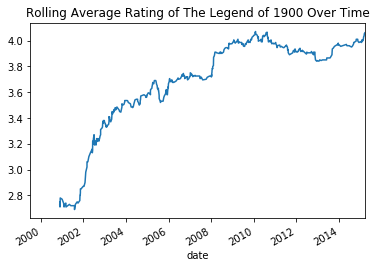

In [121]:
ordered.loc[ordered['movieId'] == 2691].set_index('date').rolling(100).mean()['rating'].plot()
plt.title("Rolling Average Rating of The Legend of 1900 Over Time");
plt.savefig('legend1900.png')

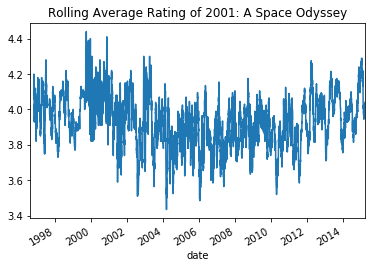

In [256]:
ordered.loc[ordered['movieId'] == 924].set_index('date').rolling(100).mean()['rating'].plot()
plt.title("Rolling Average Rating of 2001: A Space Odyssey");
plt.savefig('spaceodyssey.png')

In [81]:
ordered.loc[ordered['movieId'] == 6271].rolling(100).mean()

,userId,movieId,rating,timestamp
1315551,NaN,NaN,NaN,NaN
17090302,NaN,NaN,NaN,NaN
17026129,NaN,NaN,NaN,NaN
6355319,NaN,NaN,NaN,NaN
17557091,NaN,NaN,NaN,NaN
7730719,NaN,NaN,NaN,NaN
631699,NaN,NaN,NaN,NaN
18185418,NaN,NaN,NaN,NaN
14743346,NaN,NaN,NaN,NaN
2717722,NaN,NaN,NaN,NaN


In [82]:
ratings.loc[18098670, :]

userId       1.251780e+05
movieId      6.271000e+03
rating       4.000000e+00
timestamp    1.055953e+09
Name: 18098670, dtype: float64

In [86]:
datetime.datetime.fromtimestamp(ratings.loc[11144968, :].timestamp)

datetime.datetime(2010, 5, 10, 17, 31, 17)

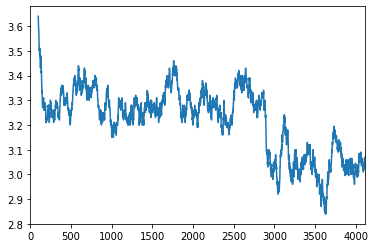

In [42]:
ts.rolling(100).mean().reset_index()['rating'].plot()

In [29]:
ts.rolling(100).mean()

14452501      NaN
17935927      NaN
6734025       NaN
16464859      NaN
17598917      NaN
            ...  
13893824    3.855
7643245     3.845
1767207     3.825
6035991     3.855
11527412    3.860
Name: rating, Length: 49695, dtype: float64